In [1]:
#import the necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
### Graphical Decision Trees
import os
from IPython.display import Image

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

In [2]:
# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [3]:
df = pd.read_csv('churn raw data.csv')

In [5]:
df.shape

(10000, 14)

In [6]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]
[0 1] 2


In [11]:
# Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df2 = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

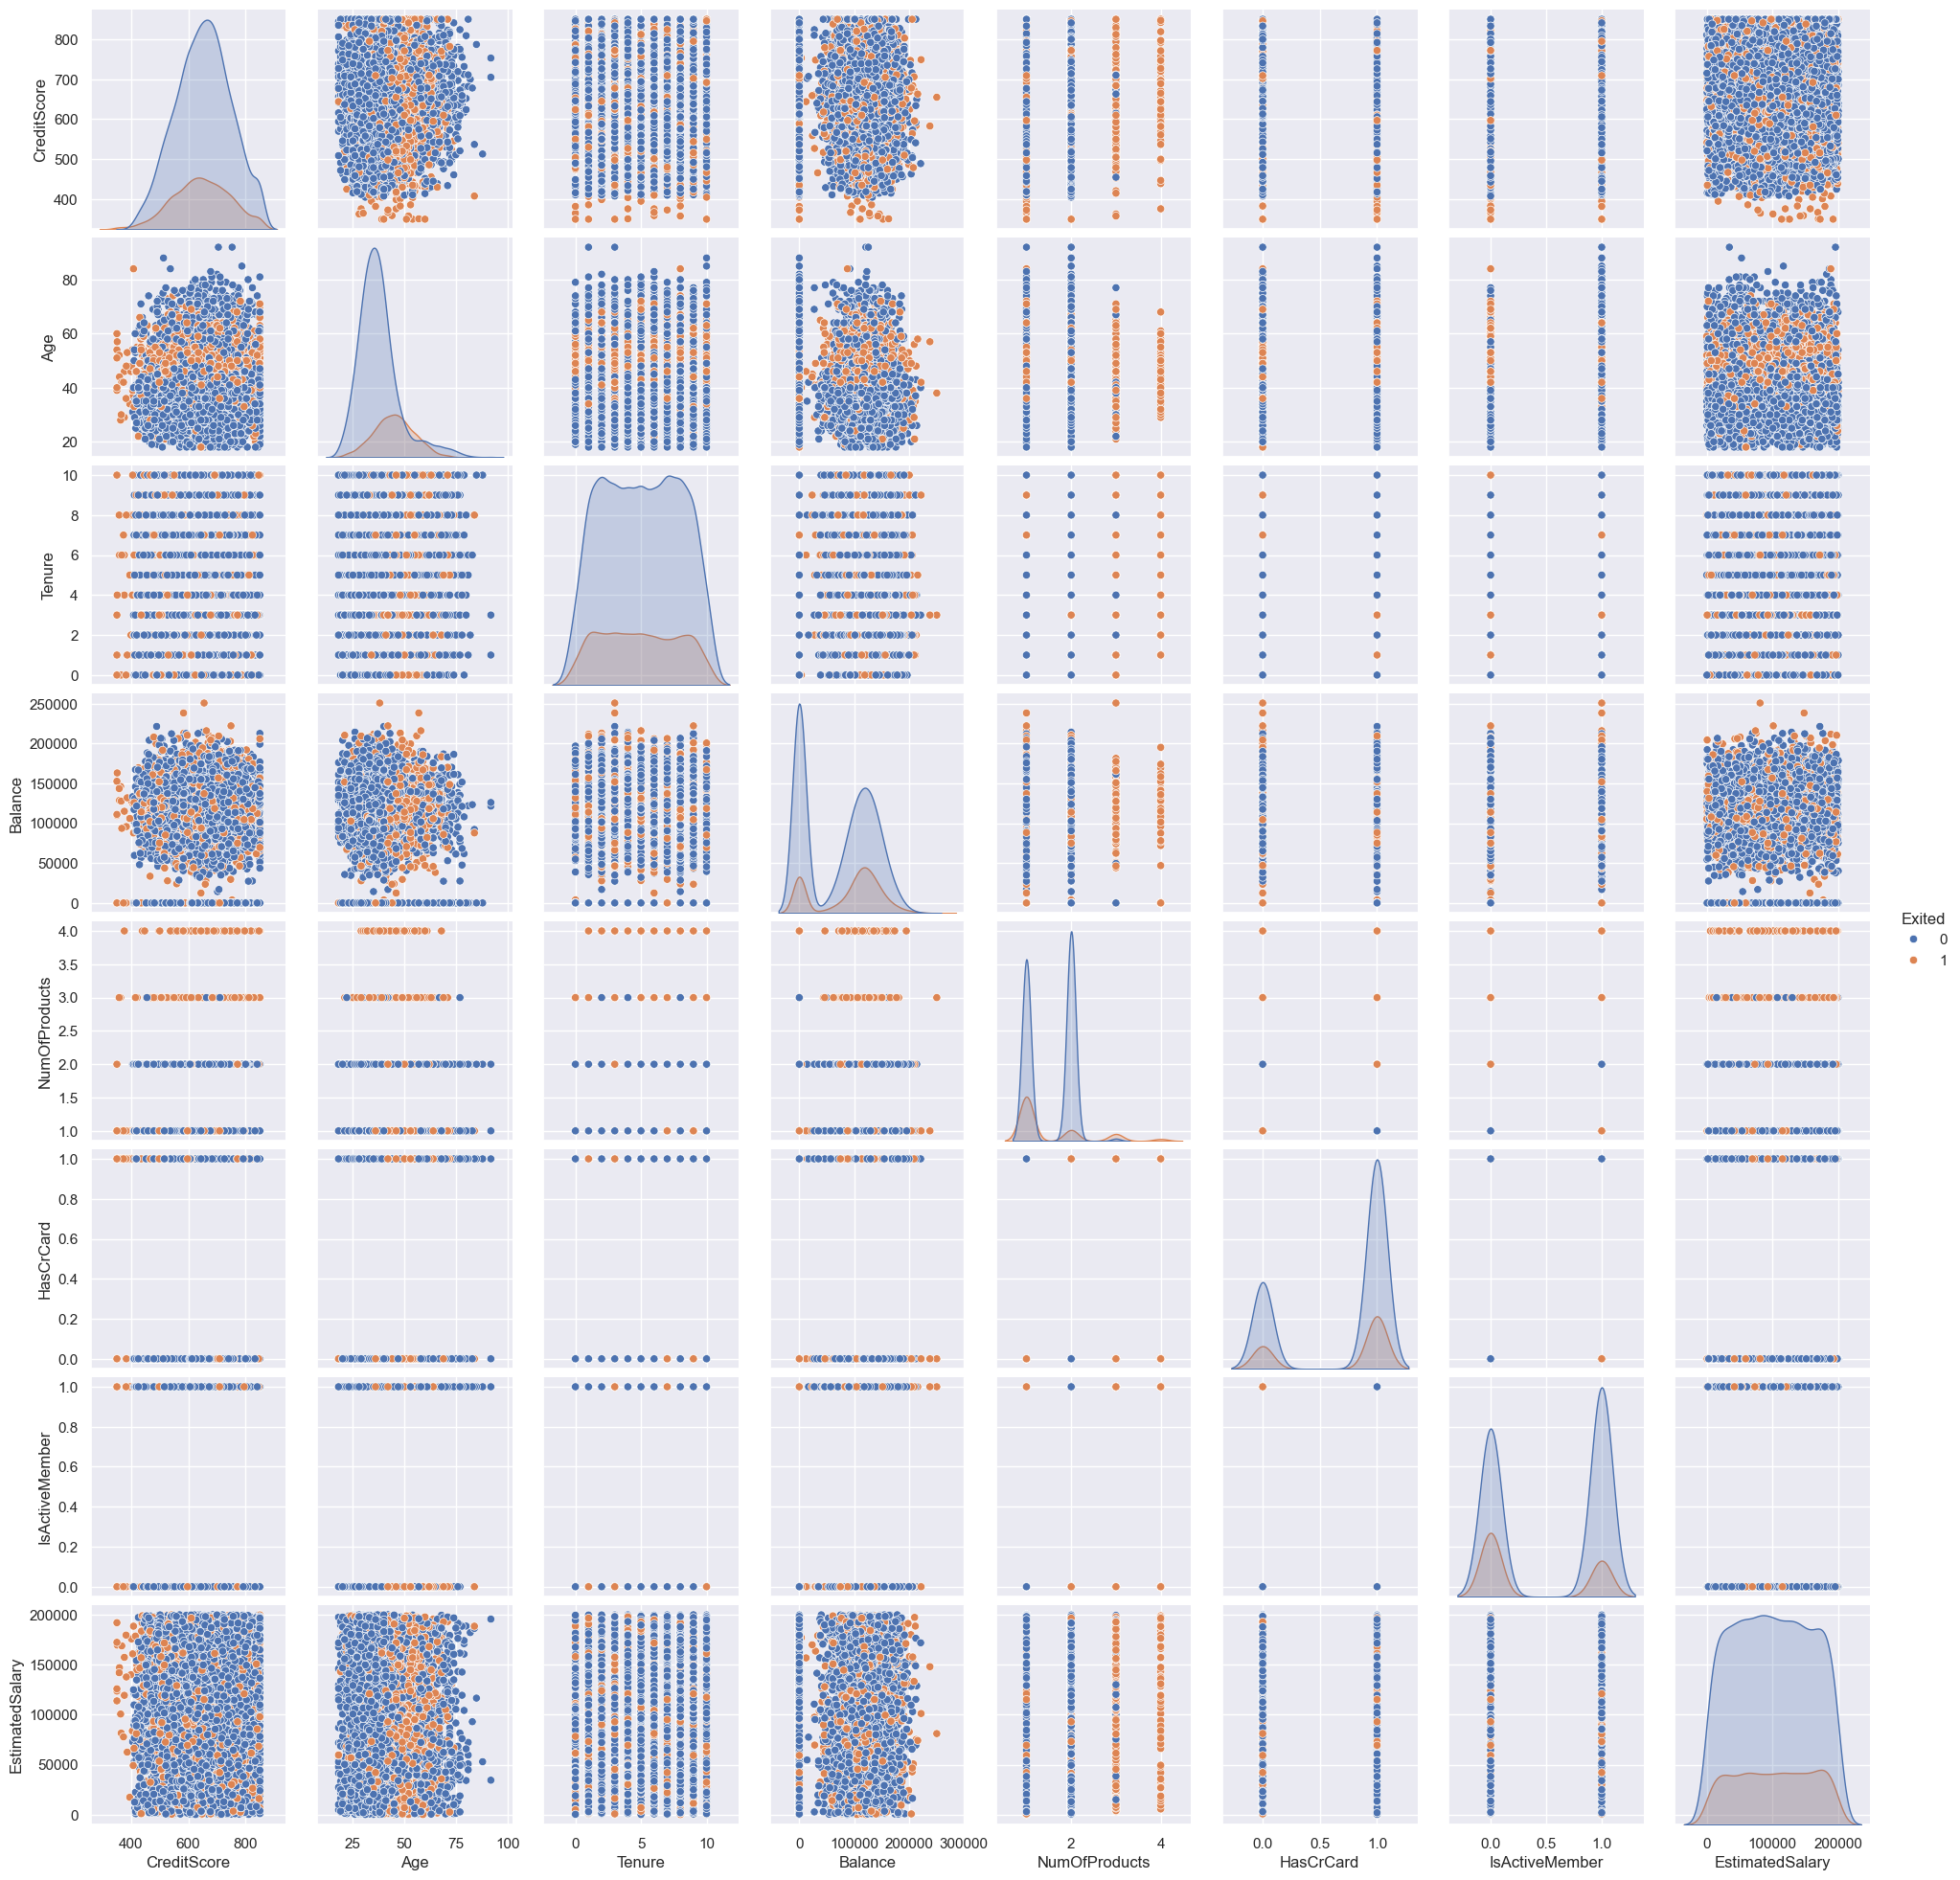

In [15]:
# Visualize the data using seaborn Pairplots
g = sns.pairplot(df2, hue = 'Exited', diag_kws={'bw': 0.2})

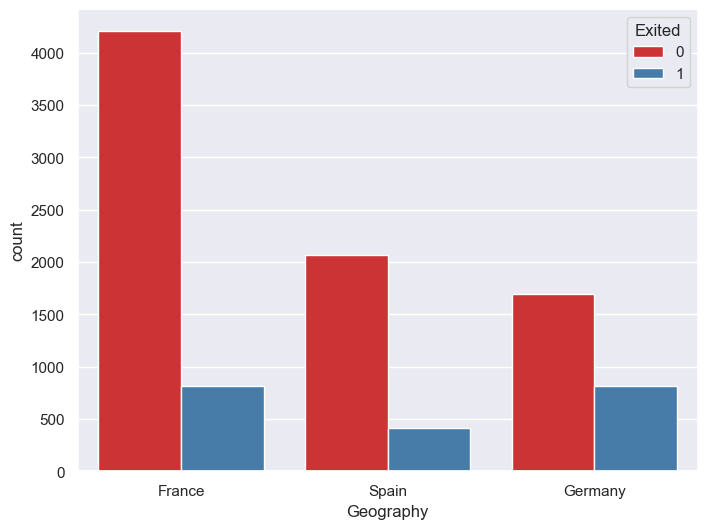

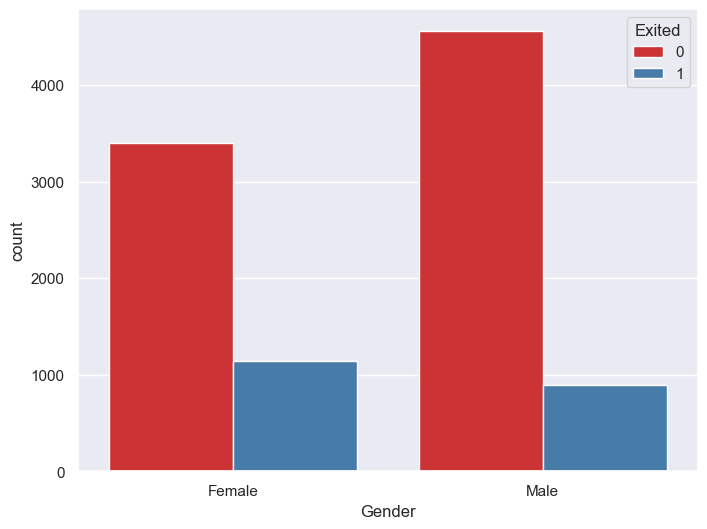

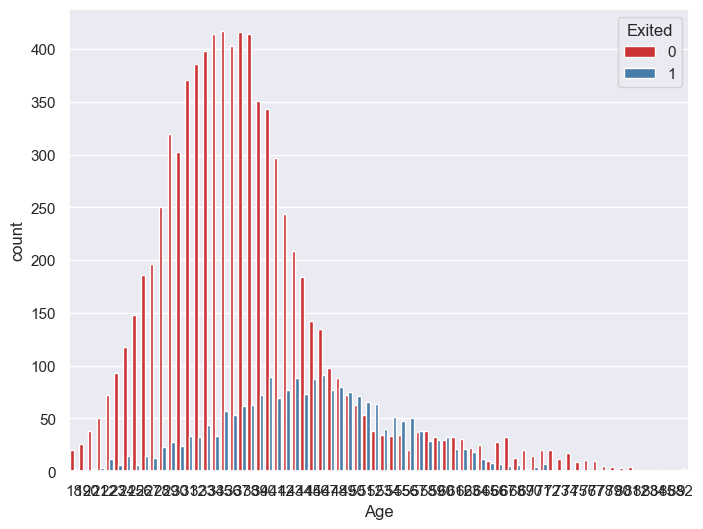

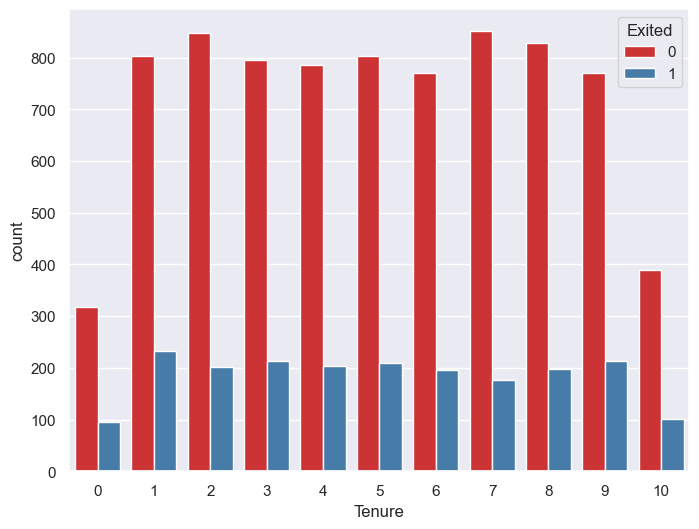

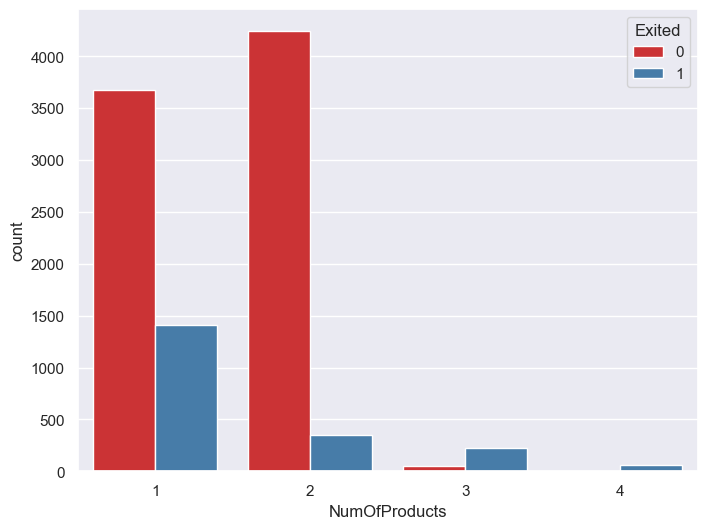

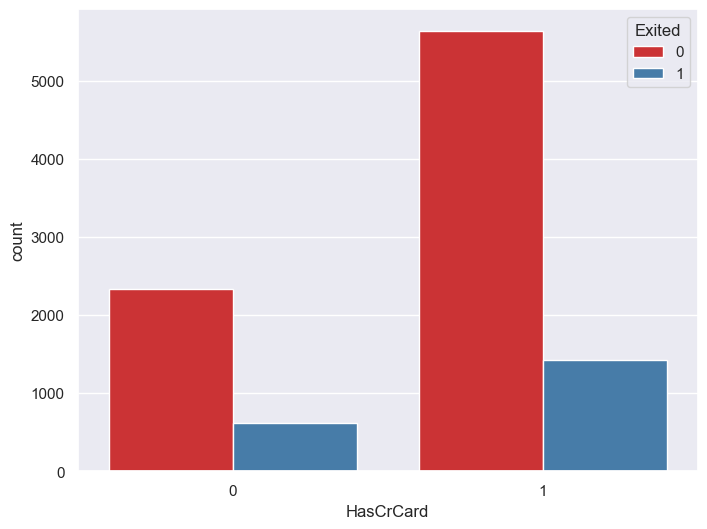

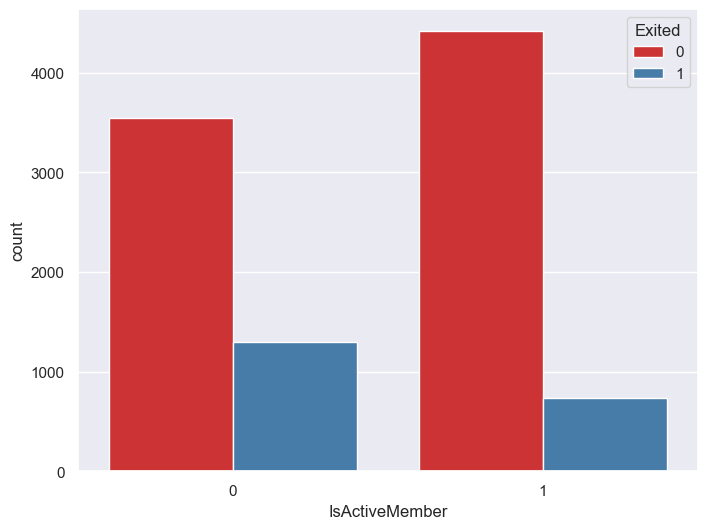

In [17]:
# Investigate all the features
features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=df2, hue='Exited', palette="Set1")


In [29]:
# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [30]:
# Making categorical variables into numeric representation

new_df = pd.get_dummies(df2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype=int)

new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [31]:
# Scaling our columns
scale_vars = ['CreditScore', 'EstimatedSalary', 'Balance', 'Age']
scaler = MinMaxScaler()
new_df[scale_vars] = scaler.fit_transform(new_df[scale_vars])
new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


In [32]:
print(new_df['Balance'].min())
print(new_df['Balance'].max())


0.0
1.0


In [36]:
X = new_df.drop('Exited', axis=1).values# Input features (attributes)

y = new_df['Exited'].values # Target vector

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


In [39]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [43]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_df.drop('Exited', axis=1).columns,    
    class_names=new_df['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
     
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [45]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_df.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
    
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.638
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.362
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.000


,index,Variable,Feature Importance Score
0,1,Age,0.638215
1,4,NumOfProducts,0.361785
2,0,CreditScore,0.000000
3,2,Tenure,0.000000
4,3,Balance,0.000000
5,5,EstimatedSalary,0.000000
6,6,Geography_France,0.000000
7,7,Geography_Germany,0.000000
8,8,Geography_Spain,0.000000
9,9,Gender_Female,0.000000


In [46]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8198571428571428
Testing Accuracy is:  0.8193333333333334


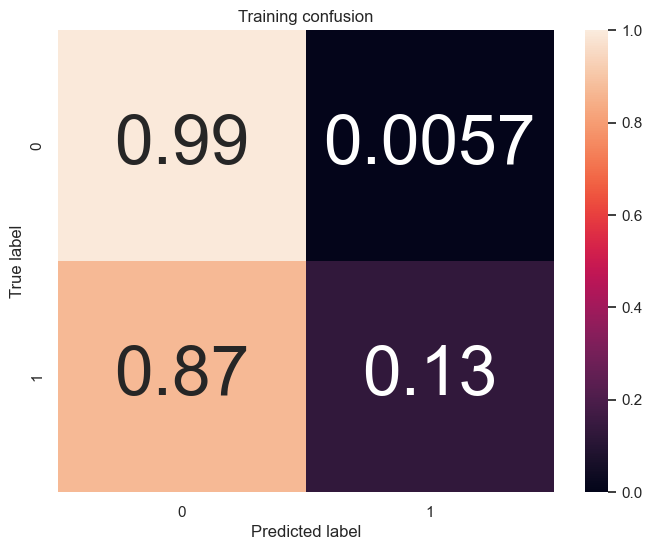

In [47]:
# Confusion Matrix function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size': 50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example of how to call the function to plot the confusion matrix
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')


In [49]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FP


# False negative rate or Miss Rate
FNR = FN / (TP+FN)
print("The Miss Rate rate per class is: ", FNR)

# Classification error
CER = (FP+FN) / (TP+FP+FN+TN)
print("The classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN) / (TP+FP+FN+TN)
print("The accuracy of each class is", ACC)
print("")

# Total averages:
print("The average Recall is: ", TPR.sum()/2)
print("The average Precision is: ", PPV.sum()/2)
print("The average False Alarm is: ", FPR.sum()/2)
print("The average Miss Rate rate is: ", FNR.sum()/2)
print("The average Classification error is", CER.sum()/2)
print("The average Accuracy is", ACC.sum()/2)

# Explanations: https://youtu.be/0HDy6n3UD5M


The True Positive rate / Recall per class is:  [0.994269 0.132062]
The Precision per class is:  [0.818758 0.853881]
The Miss Rate rate per class is:  [0.005731 0.867938]
The classification error of each class is [0.180143 0.180143]
The accuracy of each class is [0.819857 0.819857]

The average Recall is:  0.5631657439334337
The average Precision is:  0.8363197868877518


NameError: name 'FPR' is not defined